In [71]:
#Importing packages
import pandas as pd
import numpy as np

# Part 1

Importing the streaming file

In [72]:
streaminghistory = pd.read_json("StreamingHistory3.json")

In [73]:
streaminghistory.to_csv("StreamingHistory3.csv")

In [74]:
streaminghistory

endTime artistName                             trackName  \
0     2023-11-03 06:05      Drake        Fair Trade (with Travis Scott)   
1     2023-11-03 06:05      Drake                             Fake Love   
2     2023-11-03 06:05      Drake  Laugh Now Cry Later (feat. Lil Durk)   
3     2023-11-03 06:05      Drake                          Passionfruit   
4     2023-11-03 06:05      Drake             Hold On, We're Going Home   
...                ...        ...                                   ...   
1241  2023-11-11 22:46      Drake                                Energy   
1242  2023-11-11 23:22      Drake                         Nice For What   
1243  2023-11-11 23:25      Drake                         Nice For What   
1244  2023-11-11 23:30      Drake                               Jumpman   
1245  2023-11-11 23:49      Drake                             I'm Upset   

      msPlayed  
0         1540  
1          520  
2          850  
3          650  
4         1750  
...        ...  
1241    181933  
1242    155709  
1243      3110  
1244    205879  
1245      1440  

[1246 rows x 4 columns]

In [75]:
streaminghistory["endTime"].to_csv("MysteryData.csv")

# Part 2

In [76]:
#Importing Erica's data
timestamps = pd.read_csv("update_timestamps.csv")

In [77]:
#Sorting the dates and time
timestamps["Activity Date"] = pd.to_datetime(timestamps["Activity Date"])
timestamps = timestamps.sort_values(by = "Activity Date")
timestamps

Unnamed: 0.1  Unnamed: 0       Activity Date
4495          4495        4495 2020-05-10 09:26:26
7392          7392        7392 2020-05-10 09:26:27
7587          7587        7587 2020-05-10 09:26:28
5062          5062        5062 2020-05-10 09:29:02
5063          5063        5063 2020-05-15 14:04:04
...            ...         ...                 ...
1513          1513        1513 2023-10-23 01:54:21
218            218         218 2023-10-23 01:54:22
8126          8126        8126 2023-10-23 22:04:58
2923          2923        2923 2023-10-23 22:05:01
2250          2250        2250 2023-10-23 22:05:05

[9384 rows x 3 columns]

In [78]:
#Creating new column for difference
timestamps["Time Difference"] = timestamps["Activity Date"].diff()

In [79]:
#Figuring out the max time difference
print(timestamps["Time Difference"].max())

7 days 18:39:40


The largest time difference in this dataset is 7 days, 18 hours, 39 minutes and 40 seconds

In [80]:
#Figuring out the average time difference
print(timestamps["Time Difference"].mean())

0 days 03:13:36.318767984


The average time difference in this dataset is 3 hours, 13 minutes and 36 seconds

In [81]:
#Figuring out which date had the most timestamps
timestamps["Date"] = pd.DatetimeIndex(timestamps['Activity Date']).date
timestamps

Unnamed: 0.1  Unnamed: 0       Activity Date Time Difference        Date
4495          4495        4495 2020-05-10 09:26:26             NaT  2020-05-10
7392          7392        7392 2020-05-10 09:26:27 0 days 00:00:01  2020-05-10
7587          7587        7587 2020-05-10 09:26:28 0 days 00:00:01  2020-05-10
5062          5062        5062 2020-05-10 09:29:02 0 days 00:02:34  2020-05-10
5063          5063        5063 2020-05-15 14:04:04 5 days 04:35:02  2020-05-15
...            ...         ...                 ...             ...         ...
1513          1513        1513 2023-10-23 01:54:21 0 days 00:00:02  2023-10-23
218            218         218 2023-10-23 01:54:22 0 days 00:00:01  2023-10-23
8126          8126        8126 2023-10-23 22:04:58 0 days 20:10:36  2023-10-23
2923          2923        2923 2023-10-23 22:05:01 0 days 00:00:03  2023-10-23
2250          2250        2250 2023-10-23 22:05:05 0 days 00:00:04  2023-10-23

[9384 rows x 5 columns]

In [82]:
print(timestamps["Date"].value_counts())

2022-06-27    64
2023-08-22    58
2021-08-03    55
2022-03-22    54
2022-10-30    51
              ..
2021-09-05     1
2023-04-09     1
2021-09-03     1
2020-11-28     1
2023-04-02     1
Name: Date, Length: 1128, dtype: int64


It seems like 6/27/2022 had the most timestamps with 64.

In [83]:
#Creating a new column for Year + Month
timestamps["Month_Year"] = pd.DatetimeIndex(timestamps["Date"]).to_period('M')
timestamps

Unnamed: 0.1  Unnamed: 0       Activity Date Time Difference  \
4495          4495        4495 2020-05-10 09:26:26             NaT   
7392          7392        7392 2020-05-10 09:26:27 0 days 00:00:01   
7587          7587        7587 2020-05-10 09:26:28 0 days 00:00:01   
5062          5062        5062 2020-05-10 09:29:02 0 days 00:02:34   
5063          5063        5063 2020-05-15 14:04:04 5 days 04:35:02   
...            ...         ...                 ...             ...   
1513          1513        1513 2023-10-23 01:54:21 0 days 00:00:02   
218            218         218 2023-10-23 01:54:22 0 days 00:00:01   
8126          8126        8126 2023-10-23 22:04:58 0 days 20:10:36   
2923          2923        2923 2023-10-23 22:05:01 0 days 00:00:03   
2250          2250        2250 2023-10-23 22:05:05 0 days 00:00:04   

            Date Month_Year  
4495  2020-05-10    2020-05  
7392  2020-05-10    2020-05  
7587  2020-05-10    2020-05  
5062  2020-05-10    2020-05  
5063  2020-05-15    2020-05  
...          ...        ...  
1513  2023-10-23    2023-10  
218   2023-10-23    2023-10  
8126  2023-10-23    2023-10  
2923  2023-10-23    2023-10  
2250  2023-10-23    2023-10  

[9384 rows x 6 columns]

In [84]:
print(timestamps["Month_Year"].value_counts())

2023-08    521
2022-06    494
2022-03    491
2023-09    443
2023-10    441
2022-08    404
2022-10    355
2023-06    314
2022-05    306
2022-11    283
2020-08    274
2023-07    256
2022-09    249
2022-02    244
2021-02    241
2021-11    231
2022-01    213
2021-05    212
2022-07    210
2020-09    203
2021-01    191
2023-05    181
2021-08    181
2020-10    172
2021-07    172
2021-06    163
2022-04    157
2023-04    156
2021-09    155
2021-10    151
2021-12    150
2021-03    146
2021-04    140
2023-03    140
2020-11    119
2020-12    114
2022-12    109
2020-07    106
2023-02    101
2023-01     93
2020-06     74
2020-05     28
Freq: M, Name: Month_Year, dtype: int64


It seems as if August of 2023 has the most timestamps with 521

In [85]:
timestamps["Counts"] = timestamps.groupby("Date")["Date"].transform("count")
timestamps

Unnamed: 0.1  Unnamed: 0       Activity Date Time Difference  \
4495          4495        4495 2020-05-10 09:26:26             NaT   
7392          7392        7392 2020-05-10 09:26:27 0 days 00:00:01   
7587          7587        7587 2020-05-10 09:26:28 0 days 00:00:01   
5062          5062        5062 2020-05-10 09:29:02 0 days 00:02:34   
5063          5063        5063 2020-05-15 14:04:04 5 days 04:35:02   
...            ...         ...                 ...             ...   
1513          1513        1513 2023-10-23 01:54:21 0 days 00:00:02   
218            218         218 2023-10-23 01:54:22 0 days 00:00:01   
8126          8126        8126 2023-10-23 22:04:58 0 days 20:10:36   
2923          2923        2923 2023-10-23 22:05:01 0 days 00:00:03   
2250          2250        2250 2023-10-23 22:05:05 0 days 00:00:04   

            Date Month_Year  Counts  
4495  2020-05-10    2020-05       4  
7392  2020-05-10    2020-05       4  
7587  2020-05-10    2020-05       4  
5062  2020-05-10    2020-05       4  
5063  2020-05-15    2020-05       2  
...          ...        ...     ...  
1513  2023-10-23    2023-10      26  
218   2023-10-23    2023-10      26  
8126  2023-10-23    2023-10      26  
2923  2023-10-23    2023-10      26  
2250  2023-10-23    2023-10      26  

[9384 rows x 7 columns]

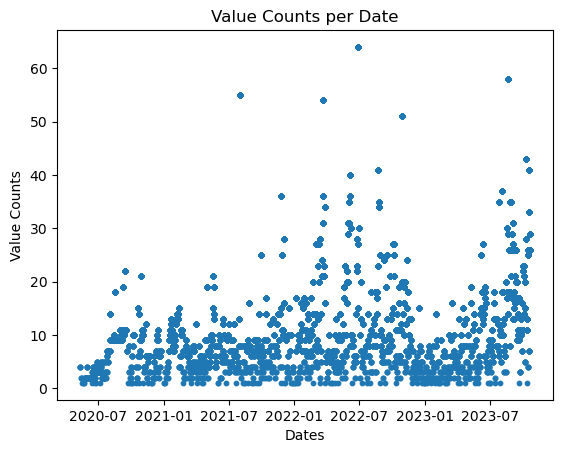

In [86]:
#Creating the visualization
from matplotlib import pyplot as plt
plt.scatter(timestamps["Date"], timestamps["Counts"], s=10)
plt.xlabel("Dates")
plt.ylabel("Value Counts")
plt.title("Value Counts per Date")
plt.show()

My guess for this dataset would be maybe some sort of music listening app? Maybe Spotify or Apple Music?

# Part 3

Making a combined visualization.


In [87]:
#Create a CSV file for Erica to use
timestamps.to_csv("Updated_Timestamps.csv")

In [88]:
#Importing the my data that Erica used and changed
erica_data = pd.read_csv('data.csv')
erica_data.head()

Unnamed: 0.1  Unnamed: 0              endTime  Time Difference  Month  \
0             0           0  2023-11-03 06:05:00              NaN     11   
1            12          12  2023-11-03 06:05:00  0 days 00:00:00     11   
2            11          11  2023-11-03 06:05:00  0 days 00:00:00     11   
3            10          10  2023-11-03 06:05:00  0 days 00:00:00     11   
4             9           9  2023-11-03 06:05:00  0 days 00:00:00     11   

   Counts Per Month        Date  Counts Per Date      Time  
0              1246  2023-11-03              143  06:05:00  
1              1246  2023-11-03              143  06:05:00  
2              1246  2023-11-03              143  06:05:00  
3              1246  2023-11-03              143  06:05:00  
4              1246  2023-11-03              143  06:05:00

In [89]:
timestamps['Activity Date'] = pd.to_datetime(timestamps["Activity Date"])


timestamps['Month'] = timestamps['Activity Date'].dt.month
timestamps.head()

Unnamed: 0.1  Unnamed: 0       Activity Date Time Difference  \
4495          4495        4495 2020-05-10 09:26:26             NaT   
7392          7392        7392 2020-05-10 09:26:27 0 days 00:00:01   
7587          7587        7587 2020-05-10 09:26:28 0 days 00:00:01   
5062          5062        5062 2020-05-10 09:29:02 0 days 00:02:34   
5063          5063        5063 2020-05-15 14:04:04 5 days 04:35:02   

            Date Month_Year  Counts  Month  
4495  2020-05-10    2020-05       4      5  
7392  2020-05-10    2020-05       4      5  
7587  2020-05-10    2020-05       4      5  
5062  2020-05-10    2020-05       4      5  
5063  2020-05-15    2020-05       2      5

In [90]:
df = erica_data.merge(timestamps, left_on=["Month"], right_on=["Month"])
df.head()

Unnamed: 0.1_x  Unnamed: 0_x              endTime Time Difference_x  Month  \
0               0             0  2023-11-03 06:05:00               NaN     11   
1               0             0  2023-11-03 06:05:00               NaN     11   
2               0             0  2023-11-03 06:05:00               NaN     11   
3               0             0  2023-11-03 06:05:00               NaN     11   
4               0             0  2023-11-03 06:05:00               NaN     11   

   Counts Per Month      Date_x  Counts Per Date      Time  Unnamed: 0.1_y  \
0              1246  2023-11-03              143  06:05:00            1995   
1              1246  2023-11-03              143  06:05:00            7260   
2              1246  2023-11-03              143  06:05:00            4643   
3              1246  2023-11-03              143  06:05:00            8472   
4              1246  2023-11-03              143  06:05:00            7958   

   Unnamed: 0_y       Activity Date Time Difference_y      Date_y Month_Year  \
0          1995 2020-11-01 22:49:51   0 days 23:02:32  2020-11-01    2020-11   
1          7260 2020-11-01 22:49:52   0 days 00:00:01  2020-11-01    2020-11   
2          4643 2020-11-01 22:49:54   0 days 00:00:02  2020-11-01    2020-11   
3          8472 2020-11-01 22:49:55   0 days 00:00:01  2020-11-01    2020-11   
4          7958 2020-11-01 22:49:56   0 days 00:00:01  2020-11-01    2020-11   

   Counts  
0      11  
1      11  
2      11  
3      11  
4      11

In [91]:
df['Total Counts'] = df['Counts'] + df['Counts Per Month']
df.head()

Unnamed: 0.1_x  Unnamed: 0_x              endTime Time Difference_x  Month  \
0               0             0  2023-11-03 06:05:00               NaN     11   
1               0             0  2023-11-03 06:05:00               NaN     11   
2               0             0  2023-11-03 06:05:00               NaN     11   
3               0             0  2023-11-03 06:05:00               NaN     11   
4               0             0  2023-11-03 06:05:00               NaN     11   

   Counts Per Month      Date_x  Counts Per Date      Time  Unnamed: 0.1_y  \
0              1246  2023-11-03              143  06:05:00            1995   
1              1246  2023-11-03              143  06:05:00            7260   
2              1246  2023-11-03              143  06:05:00            4643   
3              1246  2023-11-03              143  06:05:00            8472   
4              1246  2023-11-03              143  06:05:00            7958   

   Unnamed: 0_y       Activity Date Time Difference_y      Date_y Month_Year  \
0          1995 2020-11-01 22:49:51   0 days 23:02:32  2020-11-01    2020-11   
1          7260 2020-11-01 22:49:52   0 days 00:00:01  2020-11-01    2020-11   
2          4643 2020-11-01 22:49:54   0 days 00:00:02  2020-11-01    2020-11   
3          8472 2020-11-01 22:49:55   0 days 00:00:01  2020-11-01    2020-11   
4          7958 2020-11-01 22:49:56   0 days 00:00:01  2020-11-01    2020-11   

   Counts  Total Counts  
0      11          1257  
1      11          1257  
2      11          1257  
3      11          1257  
4      11          1257

In [92]:
fig = plt.figure(figsize = (20, 5))

df.plot(x='Month', y='Total Counts', kind='scatter')

plt.title('Erica & Hanri Combined Visualization')

plt.show()

<Figure size 2000x500 with 0 Axes>

This visualization is interesting for many reasons. First, it is important to note that Erica's original dataset showed app update and redownload history from 2020-present. This is a very large dataset spanning a very long period of time. Hanri's dataset covered his Spotify activity during November of 2023. 

We decided to plot the total numbers of data entries in November between both datasets. This is what our column "Total Counts" represents. 

The cluster of dots located directly above the 11 represent all of the data entries from both data sets on the 11th month of the year. The highest data point on the graph, which values over 1280 counts, comes from Hanri's original dataset. Because there were this many data entries in November in Hanri's dataset, and there were never this many entries in November in Erica's original dataset, there appears to be a significant gap in the plot.

From this visualization we can conclude that there is much more data being saved *within* apps like Spotify or Apple music (i.e. listening activity, browsing activity,etc) than data being saved *about* the same apps: i.e. updates, downloads, redownloads, etc.. 

# Part 4

Since my data is just Spotify, I felt comfortable enough to share my thought process and also share my data so I could make a visualization through matplotlib.

The first question I am going to answer is what artist in this half month span did I listen to the most? I am then going to import another file to compare my favorite artist throughout this month to my favorite artist in late 2022.

The second question I am going to answer is what tracks I have listened to the most and compare it to my earlier listens. Since this question is quite similar to the first question, I am going to combine them into one report and show my findings.

In [93]:
print(streaminghistory["artistName"].value_counts())

Drake              222
Giveon             132
SZA                 87
Daniel Caesar       73
Kanye West          56
                  ... 
Lana Del Rey         1
Roddy Ricch          1
Young Nudy           1
The Beach Boys       1
The Buckinghams      1
Name: artistName, Length: 117, dtype: int64


It seems like in the first half of November, I listened to Drake, Giveon, SZA, Daniel Caesar and Kanye the most.

In [94]:
print(streaminghistory["trackName"].value_counts())

Snooze                    54
Like I Want You           48
Heartbreak Anniversary    37
지금 이 순간                   33
Kill Bill                 31
                          ..
WHISTLE                    1
How You Like That          1
pick up the phone          1
On Me                      1
Kind of a Drag             1
Name: trackName, Length: 349, dtype: int64


I can't be too surprised with the results, as the 1st and 5th song are SZA songs, and the 2nd and 3rd songs are Giveon songs. One thing I am surprised about is the Korean song on the list. It is not something I normally listen to, I usually listen it in the car when I am by myself and want to sing.

In [95]:
#Importing the other, larger data file
streaminghistory_2 = pd.read_json("StreamingHistory0.json")
streaminghistory_2.to_csv("StreamingHistory0.csv")
streaminghistory_2

endTime          artistName                trackName  msPlayed
0     2022-11-10 23:12               Drake               Circo Loco    174940
1     2022-11-11 03:01               Drake               Circo Loco      7509
2     2022-11-11 03:02        The Platters  Smoke Gets In Your Eyes     41714
3     2022-11-11 03:02  Earth, Wind & Fire  After the Love Has Gone      2391
4     2022-11-11 03:05        The Platters  Smoke Gets In Your Eyes    160933
...                ...                 ...                      ...       ...
9995  2023-03-26 01:07        Lil Uzi Vert                  Lo Mein    195299
9996  2023-03-26 01:12        Travis Scott                 Antidote    262693
9997  2023-03-26 01:14              DaBaby                    VIBEZ    144935
9998  2023-03-26 01:18      Kendrick Lamar       Backseat Freestyle    212653
9999  2023-03-26 01:21              Future                 Mask Off    204600

[10000 rows x 4 columns]

In [96]:
print(streaminghistory_2["artistName"].value_counts())

Metro Boomin      1938
Kendrick Lamar    1019
Kanye West         551
Drake              449
Baby Keem          409
                  ... 
Takeoff              1
Dess Dior            1
Bobby Shmurda        1
LL COOL J            1
Bobby Caldwell       1
Name: artistName, Length: 436, dtype: int64


This results for me was definitely expected as I am a huge rap listener. My top 5 artists are all rap artists so compared to my November results this was more of what I expected.

In [97]:
print(streaminghistory_2["trackName"].value_counts())

Superhero (Heroes & Villains) [with Future & Chris Brown]                                                 470
I Wonder                                                                                                  322
HOTEL LOBBY (Unc & Phew)                                                                                  306
Creepin' (with The Weeknd & 21 Savage)                                                                    270
Jimmy Cooks (feat. 21 Savage)                                                                             247
                                                                                                         ... 
Yeah! (feat. Lil Jon & Ludacris)                                                                            1
naked freestyle                                                                                             1
Where The Hood At                                                                                           1
C.R.E.A.M.

All of the tracks except for the 4th track are all rap songs, with the 4th track being an R&B song, so the results are what I expected.

All in all, I was quite surprised with my results from November, and not surprised with my earlier results. I think this is due to the fact that I often let my friends use my phone for aux whenever I drive around, and I do drive quite a bit everyday. Saying that, I also feel like the songs that they queue have been influencing what I have been also listening to, as I had really never listened to artists like Giveon or Daniel Caesar much before they started being played on the aux quite a bit. As for my earlier results, I have always been a huge rap fan, specifically Kendrick Lamar, Kanye and Drake so those artists come with no surprise, as well as Metro Boomin, who is my favorite rap producer by far. Baby Keem rounding out the list was a bit curious for me as he is a recent artist, but since the fact that he collaborates with Kendrick Lamar a lot, it does make sense to me.

As for the tracks, similar to what I said about the artists, my top tracks were mainly rap in my earlier listens which was what I expected, compared to the first half the month where I listened to R&B music. I think the reason is me being influenced by my friends, as I said earlier.

For my data manipulation, I am going to create an Artist Count column for both datasets, and for the visualization, I am going to plot both datasets, with it being an Artist vs Artist Count scatterplot.

In [98]:
#Creating the new columns
streaminghistory["Artist Counts"] = streaminghistory.groupby("artistName")["artistName"].transform("count")
streaminghistory_2["Artist Counts"] = streaminghistory_2.groupby("artistName")["artistName"].transform("count")

/Users/hanri/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanri/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanri/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


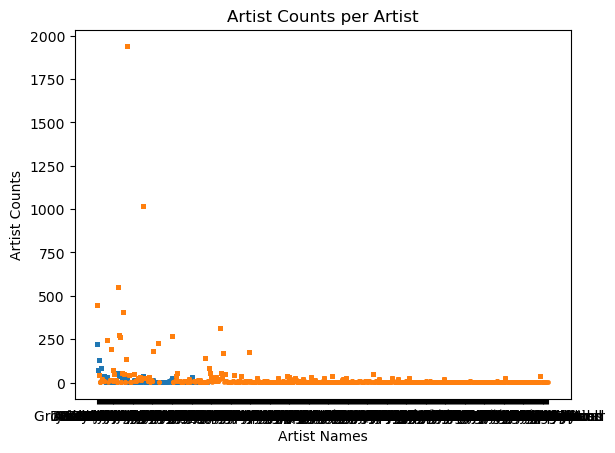

In [99]:
#Plotting both datasets
plt.scatter(streaminghistory["artistName"], streaminghistory["Artist Counts"], s=10, linewidth = 0.25)
plt.scatter(streaminghistory_2["artistName"], streaminghistory_2["Artist Counts"], s=10, linewidth = 0.25)
plt.xlabel("Artist Names")
plt.ylabel("Artist Counts")
plt.title("Artist Counts per Artist")
plt.show()

The blue data represents the data from November, and the orange data represents the data from earlier this year.

Visualization looks correct as the orange dataset has about 8x more data than the blue dataset, and in the visualization, it does seem as if there is roughly 8x more data, and if we take the maximum from the blue dataset, which is around 250 counts, and the maximum from the orange dataset, which is about 2000 counts, 2000 is 8 times more than 250, which checks out.